In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-14.223070713688742 60.9169596178817
61.14743552585344 -133.70538554222617
-89.01072208384676 77.85563783718618
-71.45276288316391 45.07865684755521
24.218327974776443 -3.7942852009039996
-65.45645655346617 47.29444915641639
-66.8370931317524 -50.07826912317543
-49.28248069566285 150.8794181898773
66.23386830086369 59.52261321220766
-74.50121492227515 119.09784475515369
75.95599638887316 -6.096865650303926
23.16756280238269 -29.065638858572726
75.97078928796691 133.43422482338178
-64.47349518566544 92.57136050350181
89.00735071440448 164.75648677563493
-61.75392665900765 -107.15340150210042
-52.10782012480379 -58.29798097787088
-45.04458656449874 100.25608787658092
14.272798253159706 -93.55484982282066
76.65466635581427 46.11058508616023
45.63136345481553 -61.461179688962034
14.451472098241467 -105.5278713664237
-29.650485390917417 113.05383544410284
-75.29237559747423 2.7032422989749136
64.64296716355364 140.8581766501316
24.66256787128927 125.77697148776582
9.556300927761768 -36.3455

-80.19981326909628 -38.07496926004896
-17.581703488496785 -132.04422059406036
42.011657422300715 -80.93542074335484
39.7787951101254 93.1039688060265
-66.74029046027844 -172.15934418901935
-8.63680204209821 -146.7114411943187
50.206613554788476 116.48056503067932
83.87524372946794 176.28049832226225
66.5137837133222 2.3319553610936055
8.620005000784047 164.76924478217927
-33.876659150216696 -135.89995170854874
-18.89916729032312 -92.99542715551624
59.10785863672902 65.46045196559996
13.591685019864855 174.15832153454483
63.9652012291769 -130.05828659712031
-11.84784823593526 99.06963930072027
7.576516589092876 171.43278080660298
-81.96321337910133 3.445313744134296
-62.495116780901014 62.630673179333996
42.803380567084076 67.04792388375108
15.28730646711108 -135.30088389101206
-54.770942415323596 -124.7255911727617
35.37154481684975 45.397945240454874
-85.29332772634586 -163.88983371220286
-3.8796586740270698 -67.40577650738932
-19.06034462668144 82.35819212651688
-16.823729307916423 1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | grand gaube
Processing Record 2 of Set 12 | whitehorse
Processing Record 3 of Set 12 | busselton
Processing Record 4 of Set 12 | port alfred
Processing Record 5 of Set 12 | taoudenni
Processing Record 6 of Set 12 | east london
Processing Record 7 of Set 12 | ushuaia
Processing Record 8 of Set 12 | hobart
Processing Record 9 of Set 12 | inta
Processing Record 10 of Set 12 | albany
Processing Record 11 of Set 12 | klaksvik
Processing Record 12 of Set 12 | ponta do sol
Processing Record 13 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 12 | pevek
Processing Record 15 of Set 12 | punta arenas
Processing Record 16 of Set 12 | puerto madero
Processing Record 17 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 12 | port hawkesbury
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | geraldton
Processing Record 21 

Processing Record 34 of Set 15 | talnakh
Processing Record 35 of Set 15 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 15 | durban
Processing Record 37 of Set 15 | baykit
Processing Record 38 of Set 15 | kaeo
Processing Record 39 of Set 15 | sao joao da barra
Processing Record 40 of Set 15 | litoral del san juan
City not found. Skipping...
Processing Record 41 of Set 15 | dikson
Processing Record 42 of Set 15 | orlik
Processing Record 43 of Set 15 | sanchez
Processing Record 44 of Set 15 | safwah
City not found. Skipping...
Processing Record 45 of Set 15 | russkaya polyana
Processing Record 46 of Set 15 | gasa
Processing Record 47 of Set 15 | hrodna
Processing Record 48 of Set 15 | zhanatas
City not found. Skipping...
Processing Record 49 of Set 15 | illoqqortoormiut
City not found. Skipping...
Processing Record 50 of Set 15 | gualaquiza
Processing Record 1 of Set 16 | port elizabeth
Processing Record 2 of Set 16 | esperance
Processing Record 3 of Set 16 | praia


Processing Record 21 of Set 19 | ler
Processing Record 22 of Set 19 | kirovskiy
Processing Record 23 of Set 19 | tecoanapa
Processing Record 24 of Set 19 | finschhafen
Processing Record 25 of Set 19 | shaoyang
Processing Record 26 of Set 19 | cunday
Processing Record 27 of Set 19 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 19 | hobyo
Processing Record 29 of Set 19 | nguiu
City not found. Skipping...
Processing Record 30 of Set 19 | adrar
Processing Record 31 of Set 19 | rio grande
Processing Record 32 of Set 19 | dhidhdhoo
Processing Record 33 of Set 19 | yashkul
Processing Record 34 of Set 19 | dandong
Processing Record 35 of Set 19 | katsuura
Processing Record 36 of Set 19 | minab
Processing Record 37 of Set 19 | kungurtug
Processing Record 38 of Set 19 | roebourne
Processing Record 39 of Set 19 | terrace
Processing Record 40 of Set 19 | riverton
Processing Record 41 of Set 19 | humaita
Processing Record 42 of Set 19 | sesquile
Processing Record 43 of Set 19 | laibin
Proc

Processing Record 9 of Set 23 | pachelma
Processing Record 10 of Set 23 | monrovia
Processing Record 11 of Set 23 | shalya
Processing Record 12 of Set 23 | ruatoria
City not found. Skipping...
Processing Record 13 of Set 23 | lensk
Processing Record 14 of Set 23 | lagoa
Processing Record 15 of Set 23 | varzea grande
Processing Record 16 of Set 23 | selma
Processing Record 17 of Set 23 | ayer tawar
Processing Record 18 of Set 23 | conde
Processing Record 19 of Set 23 | riberalta
Processing Record 20 of Set 23 | awjilah
Processing Record 21 of Set 23 | honningsvag
Processing Record 22 of Set 23 | guerrero negro
Processing Record 23 of Set 23 | puerto ayacucho
Processing Record 24 of Set 23 | banda aceh
Processing Record 25 of Set 23 | sinkat
City not found. Skipping...
Processing Record 26 of Set 23 | torbay
Processing Record 27 of Set 23 | usta muhammad
Processing Record 28 of Set 23 | newport
Processing Record 29 of Set 23 | bloemfontein
Processing Record 30 of Set 23 | shenzhen
Proces

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2022-08-25 00:52:56,-20.0064,57.6608,70.20,64,53,5.01
1,Whitehorse,CA,2022-08-25 00:48:05,60.7161,-135.0538,75.02,44,75,23.02
2,Busselton,AU,2022-08-25 00:52:57,-33.6500,115.3333,54.88,61,45,4.79
3,Port Alfred,ZA,2022-08-25 00:52:57,-33.5906,26.8910,80.19,27,0,5.01
4,Taoudenni,ML,2022-08-25 00:52:57,22.6783,-3.9836,96.85,28,6,17.56
5,East London,ZA,2022-08-25 00:52:58,-33.0153,27.9116,78.31,27,0,14.20
6,Ushuaia,AR,2022-08-25 00:48:34,-54.8000,-68.3000,42.46,42,20,11.50
7,Hobart,AU,2022-08-25 00:52:58,-42.8794,147.3294,58.26,69,75,3.44
8,Inta,RU,2022-08-25 00:52:59,66.0317,60.1659,43.21,90,23,10.20
9,Albany,US,2022-08-25 00:48:09,42.6001,-73.9662,75.06,75,7,5.14


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

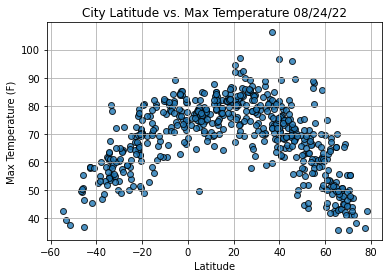

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

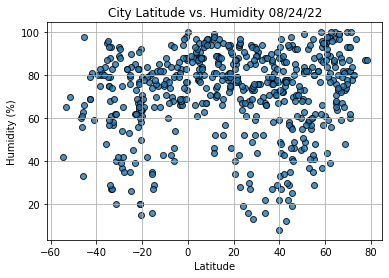

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

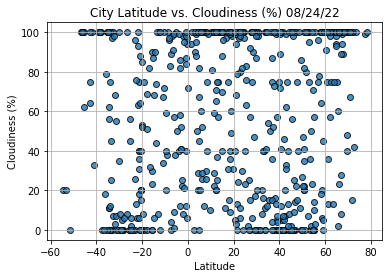

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

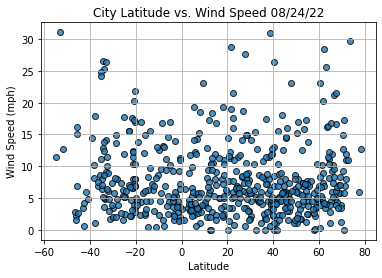

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Whitehorse,CA,2022-08-25 00:48:05,60.7161,-135.0538,75.02,44,75,23.02
4,Taoudenni,ML,2022-08-25 00:52:57,22.6783,-3.9836,96.85,28,6,17.56
8,Inta,RU,2022-08-25 00:52:59,66.0317,60.1659,43.21,90,23,10.20
9,Albany,US,2022-08-25 00:48:09,42.6001,-73.9662,75.06,75,7,5.14
10,Klaksvik,FO,2022-08-25 00:52:59,62.2266,-6.5890,50.92,89,57,28.45


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

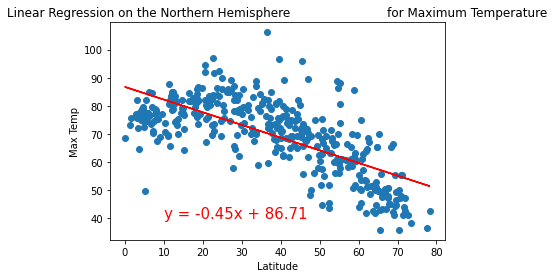

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

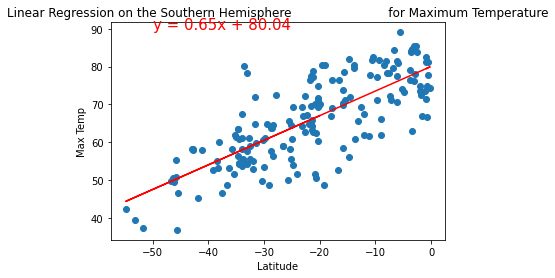

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

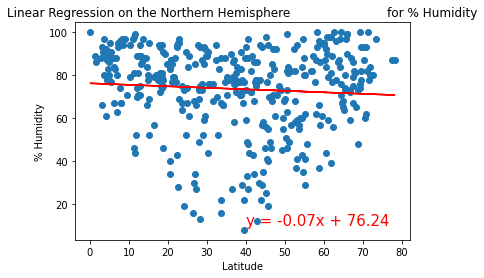

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

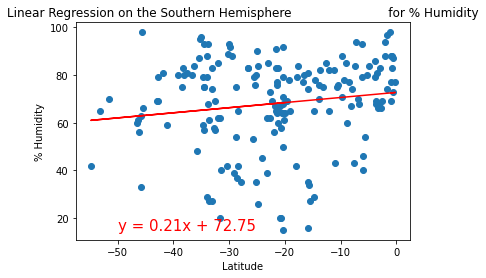

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

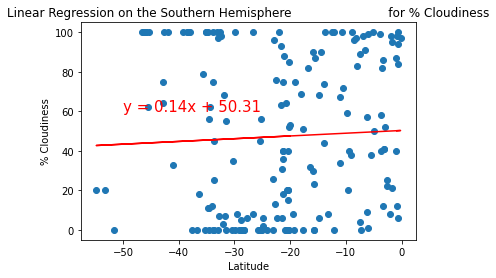

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

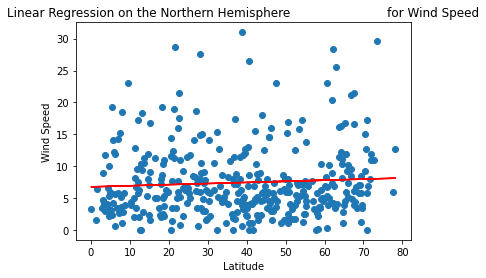

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

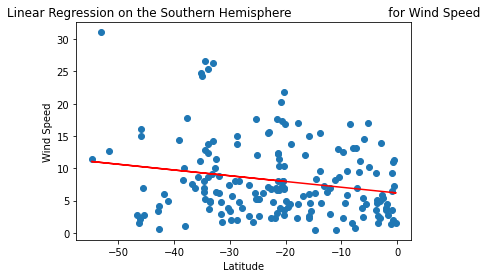

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))